In [1]:
import pandas as pd
import sqlite3
import sqlalchemy 
import matplotlib.pyplot as plt

In [2]:
try:
    conn = sqlite3.connect("C:\\Users\\s1\\OneDrive\\Desktop\\Refactoring and code review metrics\\QT_results.db")    
except Exception as e:
    print(e)

cursor = conn.cursor()

table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(table_list)

[('QT_results',)]


In [3]:
df = pd.read_sql_query("SELECT * FROM QT_results", conn)

In [6]:
last_status = df.groupby(["Github_last_commit_committer"], as_index=False)['Status'].count()
last_status_top10 = last_status.sort_values(['Status'], ascending=[False])[:10]

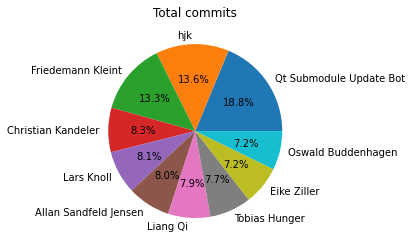

In [7]:
plt.pie(last_status_top10['Status'], autopct='%1.1f%%' , labels = last_status_top10['Github_last_commit_committer'])
plt.title('Total commits')
# plt.show()
plt.savefig('Total commits', dpi = 300)

In [213]:
last_abondoned = df[df["Status"] == "ABANDONED"].groupby(["Github_last_commit_committer"], as_index=False)['Status'].count()
last_abondoned_top10 = last_abondoned.sort_values(['Status'], ascending=[False])[:10]

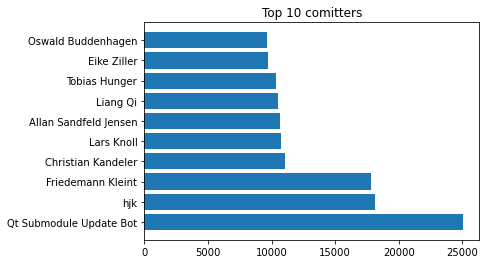

In [8]:
plt.barh(last_status_top10["Github_last_commit_committer"], last_status_top10['Status'], align='center')
plt.title('Top 10 comitters')
plt.savefig('Top 10 comitters', dpi = 300)
# plt.show()

In [11]:
last_merged = df[df["Status"] == "MERGED"].groupby(["Github_last_commit_committer"], as_index=False)['Status'].count()
last_merged_top10 = last_merged.sort_values(['Status'], ascending=[False])[:10]

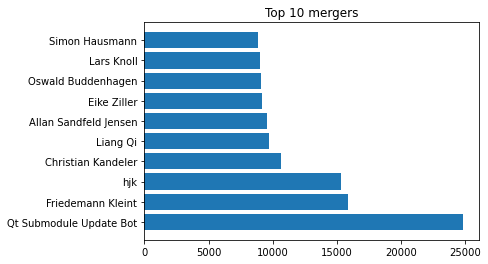

In [12]:
plt.barh(last_merged_top10["Github_last_commit_committer"], last_merged_top10['Status'], align='center')
plt.title('Top 10 mergers')
plt.savefig('Top 10 mergers', dpi = 300)
# plt.show()

In [173]:
df[["Github_last_commit_date"]] = df[["Github_last_commit_date"]].apply(pd.to_datetime)
df['commit_month'] = pd.DatetimeIndex(df['Github_last_commit_date']).month
df['commit_year'] = pd.DatetimeIndex(df['Github_last_commit_date']).month

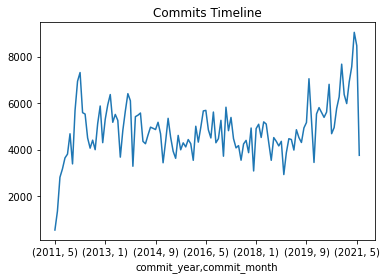

In [222]:
groupby_date =  df.groupby(['commit_year', 'commit_month']).size()
timeline_plot = groupby_date.plot(title='Commits Timeline').get_figure()
timeline_plot.savefig('commit timeline.jpg')

In [207]:
df

,index,Gerrit_id,Gerrit_url,Gerrit_branch,Gerrit_subject,Gerrit_description,owner_id,owner_name,reviewers_ids,reviewers_names,...,Github_first_commit_date,Github_first_commit_committer,Github_last_commit_id,Github_last_commit_message,Github_last_commit_date,Github_last_commit_committer,Status,commit_date,commit_month,commit_year
0,0,qt%2Fqtdeclarative~dev~I359e6d93130adc16a1debd...,https://codereview.qt-project.org//353194,dev,Use qFuzzyCompare instead comparing floating p...,comparing floating point with != is unsafe，use...,1008286,Xiao YaoBing,"[1000049, 1000072, 1000132, 1002932, 1006964, ...","['Qt Sanity Bot', 'Volker Hilsheimer', 'Eskil ...",...,2021-06-08 12:12:25.000000,Xiao YaoBing,391aecfa797d20ff742548aff48ee96eb347e6a8,Use qFuzzyCompare instead comparing floating p...,2021-06-08 12:14:22,Xiao YaoBing,ABANDONED,2021-06-08,6,2021
1,1,qt%2Fqt-conan-config~master~Ibf43752a1fb1029ed...,https://codereview.qt-project.org//342134,master,WIP: Conan profiles for qtbase,WIP: Conan profiles for qtbase Put all the us...,1001454,Iikka Eklund,"[1000003, 1000049, 1000098, 1000120, 1004184, ...","['Kai Koehne', 'Qt Sanity Bot', 'Simo Fält', '...",...,2021-04-07 08:30:27.000000,Iikka Eklund,6b7068a3b524c079de44054ea05d20a845e6d432,WIP: Conan profiles for qtbase\n\nPut all the ...,2021-04-07 08:30:27,Iikka Eklund,ABANDONED,2021-04-07,4,2021
2,2,qtsdk%2Fqtsdk~master~I5c5d08f45065c48e6243a7b2...,https://codereview.qt-project.org//320473,master,Incremental repo update mode for release_repo_...,Incremental repo update mode for release_repo_...,1001454,Iikka Eklund,"[1000049, 1000566, 1000577, 1001454, 1001521, ...","['Qt Sanity Bot', 'Samuli Piippo', 'Akseli Sal...",...,2020-11-05 10:43:21.000000,Iikka Eklund,4186214f031f9ae995a91a258c8fc9f600eac067,Incremental repo update mode for release_repo_...,2020-11-25 07:48:07,Iikka Eklund,ABANDONED,2020-11-25,11,2020
3,3,qt%2Fqtbase~dev~I6c1da865722c20bed2774b9002434...,https://codereview.qt-project.org//354269,dev,WIP: Apple: Use POSIX IPC in sandboxed applica...,WIP: Apple: Use POSIX IPC in sandboxed applica...,1000032,Tor Arne Vestbø,"[1000043, 1000049, 1000072, 1003334, 1004184]","['Morten Johan Sørvig', 'Qt Sanity Bot', 'Volk...",...,2021-06-14 16:13:37.000000,Tor Arne Vestbø,a7cccc7ad34b3f3b4cdb5b4d3c429af3135407d7,WIP: Apple: Use POSIX IPC in sandboxed applica...,2021-06-14 16:13:37,Tor Arne Vestbø,ABANDONED,2021-06-14,6,2021
4,4,qt%2Fqtqa~dev~Idcf73e9ada8759d480a0547985647c2...,https://codereview.qt-project.org//310883,dev,"tst_licenses.pl: improve ""No reference license...","tst_licenses.pl: improve ""No reference license...",1001967,Mitch Curtis,"[1000003, 1000014, 1000049, 1001967, 1006637]","['Kai Koehne', 'Friedemann Kleint', 'Qt Sanity...",...,2020-08-20 10:31:49.000000,Mitch Curtis,31089b56ba44bfcd44ed440d64e45131ca4d2c2e,"tst_licenses.pl: improve ""No reference license...",2020-08-20 11:09:07,Mitch Curtis,ABANDONED,2020-08-20,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592175,592175,qt%2Fqtconnectivity~5.10~Id256f00349d8bee8e417...,https://codereview.qt-project.org//216575,5.10,qtlite: Skip building examples when configured...,qtlite: Skip building examples when configured...,1000082,Rainer Keller,"[1000049, 1000082, 1002006]","['Qt Sanity Bot', 'Rainer Keller', 'Alex Blasc...",...,2018-01-12 12:25:37.000000,Rainer Keller,e0ef4fbc2e70622c25692262972b0dc2396af4ef,qtlite: Skip building examples when configured...,2018-01-12 12:37:21,Rainer Keller,MERGED,2018-01-12,1,2018
592176,592176,qbs%2Fqbs~master~I0a01b3642f4a16c09d189e8c2228...,https://codereview.qt-project.org//216457,master,Executor: Add missing check for module target ...,Executor: Add missing check for module target ...,1000011,Christian Kandeler,"[1000011, 1000049, 1000120, 1000530]","['Christian Kandeler', 'Qt Sanity Bot', 'Joerg...",...,2018-01-11 13:03:01.000000,Christian Kandeler,02a1f962e2c6790fc3e1d50bbbb4fda9ce88472d,Executor: Add missing check for module target .

In [8]:
# Be sure to close the connection
conn.close()

[('QT_results',)]
